___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [19]:
x_train[9].shape

(28, 28)

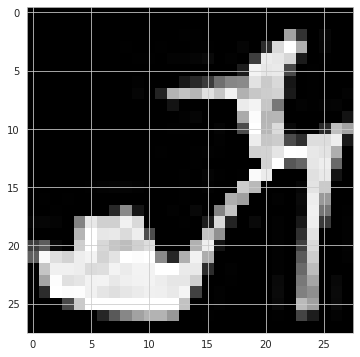

In [20]:
plt.imshow(x_train[9],cmap='gray')

In [18]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train[9]

5

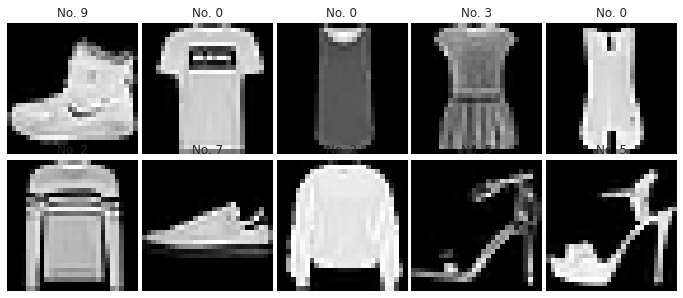

In [21]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [22]:
x_train[9].min()

0

In [23]:
x_train[9].max()

255

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [25]:
x_train[9].min()

0.0

In [26]:
x_train[9].max()

1.0

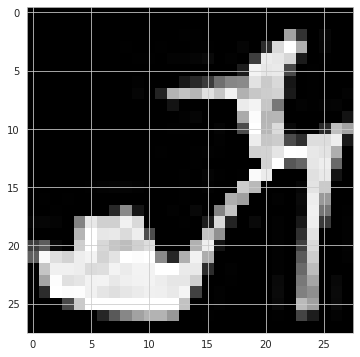

In [27]:
plt.imshow(x_train[9],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [28]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [29]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [30]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [31]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [32]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [34]:
from tensorflow.keras.utils import to_categorical

In [35]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [36]:
y_train[9]

5

In [37]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [45]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 0.3757 - accuracy: 0.8676 - val_loss: 0.3036 - val_accuracy: 0.8892
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2534 - accuracy: 0.9092 - val_loss: 0.3009 - val_accuracy: 0.8949
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2175 - accuracy: 0.9222 - val_loss: 0.2700 - val_accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1936 - accuracy: 0.9313 - val_loss: 0.2887 - val_accuracy: 0.9060
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1763 - accuracy: 0.9380 - val_loss: 0.3174 - val_accuracy: 0.9014
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1625 - accuracy: 0.9432 - val_loss: 0.2760 - val_accuracy: 0.9144
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1513 - accuracy: 0.9469 - val_loss: 0.2925 - val_accuracy

In [46]:
x_train.shape

(60000, 28, 28, 1)

In [47]:
Y_train.shape

(60000, 10)

In [48]:
model.metrics_names

['loss', 'accuracy']

In [50]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.376,0.868,0.304,0.889
1,0.253,0.909,0.301,0.895
2,0.217,0.922,0.270,0.906
3,0.194,0.931,0.289,0.906
4,0.176,0.938,0.317,0.901
5,0.162,0.943,0.276,0.914
6,0.151,0.947,0.293,0.910
7,0.139,0.951,0.325,0.905


**TASK 7: Plot values of metrics you used in your model.**

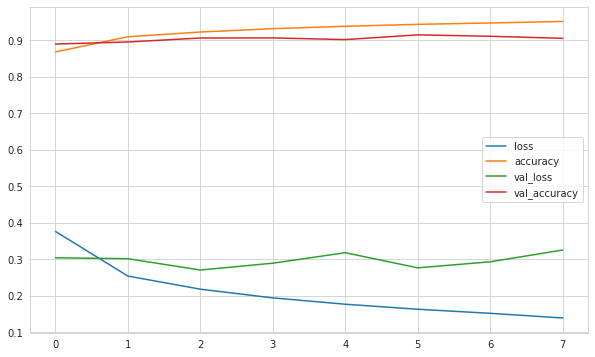

In [51]:
summary.plot();

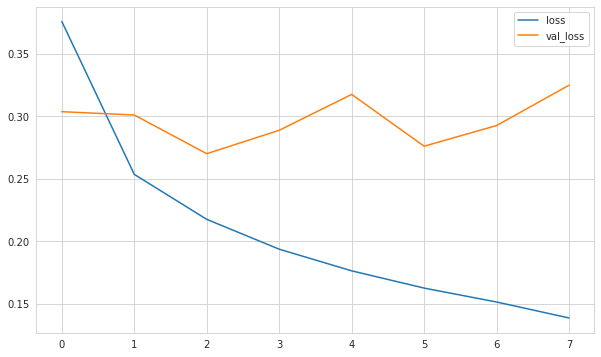

In [52]:
summary[["loss", "val_loss"]].plot();

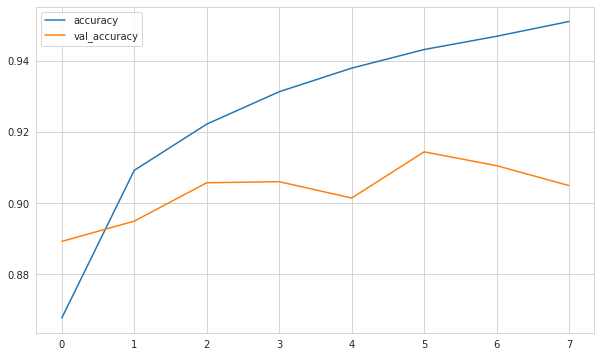

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [55]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.9144


[0.27595457434654236, 0.9143999814987183]

In [56]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27595457434654236
Test accuracy: 0.9143999814987183


In [57]:
pred_prob = model.predict(x_test)
pred_prob

array([[7.3648145e-08, 1.2920179e-11, 4.0748660e-10, ..., 1.7106334e-04,
        3.2177621e-08, 9.9977928e-01],
       [5.0475126e-07, 1.3283748e-19, 9.9999595e-01, ..., 8.1491642e-15,
        2.0828760e-14, 4.3289300e-15],
       [9.8888115e-09, 1.0000000e+00, 1.7574164e-11, ..., 3.4890517e-15,
        3.9592284e-11, 5.1885649e-16],
       ...,
       [3.0885754e-08, 3.3814283e-18, 9.4491194e-12, ..., 7.0531687e-09,
        9.9999988e-01, 3.1283442e-13],
       [6.6578748e-10, 1.0000000e+00, 9.6604365e-13, ..., 5.1157955e-13,
        1.2488158e-09, 2.1244156e-10],
       [2.3869439e-03, 2.4929552e-05, 6.6258834e-04, ..., 4.8917115e-01,
        9.1593368e-03, 3.2536805e-02]], dtype=float32)

In [58]:
pred_prob.shape

(10000, 10)

In [59]:
pred_prob[0]

array([7.3648145e-08, 1.2920179e-11, 4.0748660e-10, 1.2141542e-09,
       6.4416091e-11, 4.9562608e-05, 5.4723664e-08, 1.7106334e-04,
       3.2177621e-08, 9.9977928e-01], dtype=float32)

In [60]:
np.argmax(pred_prob[0])

9

In [61]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [62]:
y_pred.shape

(10000,)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.90      0.84      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.82      0.91      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.73      0.76      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [64]:
print(confusion_matrix(y_test, y_pred))

[[858   0  16  15   8   1  93   0   9   0]
 [  2 985   0   6   3   0   1   0   3   0]
 [ 23   0 838   7  80   1  51   0   0   0]
 [ 13  13   6 924  24   0  19   0   1   0]
 [  1   1  25  23 912   1  37   0   0   0]
 [  0   0   0   0   0 979   0  10   0  11]
 [103   2  44  26  81   0 735   0   9   0]
 [  0   0   0   0   0  12   0 953   1  34]
 [  1   2   0   7   0   3   2   2 983   0]
 [  1   0   0   0   0   5   0  17   0 977]]


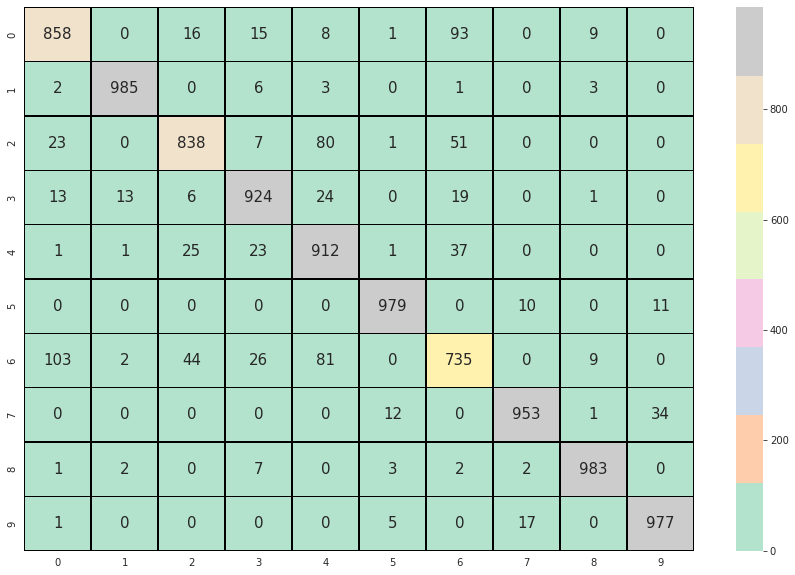

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Pastel2", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [66]:
y_test != y_pred

array([False, False, False, ..., False, False,  True])

In [67]:
(y_test != y_pred).sum()

856

## Prediction

In [71]:
number = x_test[6]

In [72]:
number.shape

(28, 28, 1)

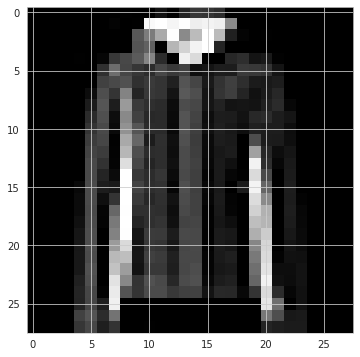

In [81]:
plt.imshow(number.reshape(28,28), cmap= "gray");

In [74]:
pred_prob = model.predict(number.reshape(1,28,28,1))
pred_prob

array([[1.6446491e-09, 7.1705706e-16, 6.4910011e-05, 1.8821435e-12,
        9.9992728e-01, 3.6146322e-11, 7.7715231e-06, 6.4434752e-14,
        4.8460822e-15, 4.1168918e-14]], dtype=float32)

In [75]:
y_pred = np.argmax(pred_prob)
y_pred

4

In [76]:
model.save("CNN-assignment-2.h5")

In [77]:
model=tf.keras.models.load_model('CNN-assignment-2.h5')

In [78]:
pred=model.predict(np.expand_dims(x_test[24],axis=0))

In [79]:
np.argmax(pred)

1

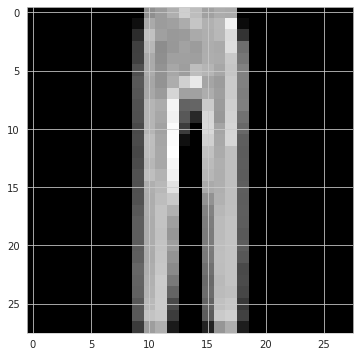

In [82]:
plt.imshow(x_test[24].reshape(28,28), cmap= "gray")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___